# Analisis de parte de monetización de la plataforma.

---

## Objetivo:

- Cuánto dinero se genera.
- Qué tipos de productos generan más ingresos.
- Qué usuarios aportan más valor.
- Cómo evolucionan los ingresos en el tiempo.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
plt.style.use("default")


Carga de datos de transacciones y usuarios para analizar ingresos.

In [2]:
transactions = pd.read_csv("../data/raw/transactions.csv")
users = pd.read_csv("../data/raw/users.csv")


Revisión de datos de transacciones.


In [3]:
transactions.head()


,transaction_id,user_id,transaction_ts,category,currency,payment_method,discount_code,gross_revenue,tax_amount,net_revenue,status,refund_ts,refund_reason
0,1,27165,2025-11-21 20:33:00,subscription,EUR,card,WELCOME10,20.68,3.60,17.09,paid,NaN,NaN
1,2,15038,2024-10-04 02:36:00,subscription,EUR,card,NONE,183.37,1.43,181.94,paid,NaN,NaN
2,3,24924,2024-11-28 19:31:00,consulting,GBP,invoice,NONE,722.02,3.73,718.29,paid,NaN,NaN
3,4,17344,2024-09-09 23:28:00,analytics_addon,EUR,card,NONE,55.20,10.20,45.00,paid,NaN,NaN
4,5,29840,2024-12-07 10:46:00,analytics_addon,EUR,card,NONE,25.00,0.00,25.00,paid,NaN,NaN


Revisión de tamaños y columnas disponibles.

In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  90000 non-null  int64  
 1   user_id         90000 non-null  int64  
 2   transaction_ts  90000 non-null  object 
 3   category        90000 non-null  object 
 4   currency        90000 non-null  object 
 5   payment_method  89372 non-null  object 
 6   discount_code   88646 non-null  object 
 7   gross_revenue   90000 non-null  float64
 8   tax_amount      90000 non-null  float64
 9   net_revenue     90000 non-null  float64
 10  status          90000 non-null  object 
 11  refund_ts       6069 non-null   object 
 12  refund_reason   6069 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 8.9+ MB


Calculamos el ingreso total generado por la plataforma.
Usamos la columna `net_revenue`, que representa el ingreso final.


In [5]:
total_revenue = transactions["net_revenue"].sum()
total_revenue


np.float64(8749142.260000002)

Analisis sobre tipo de producto genera más ingresos.


In [6]:
revenue_by_category = (
    transactions
    .groupby("category")["net_revenue"]
    .sum()
    .sort_values(ascending=False)
)

revenue_by_category

category
subscription        4156051.52
consulting          2845870.06
training             716289.73
analytics_addon      323731.75
automation_addon     281931.45
storage_pack         233884.40
support_pack         191383.35
Name: net_revenue, dtype: float64

Representación visual de ingresos por categoría.


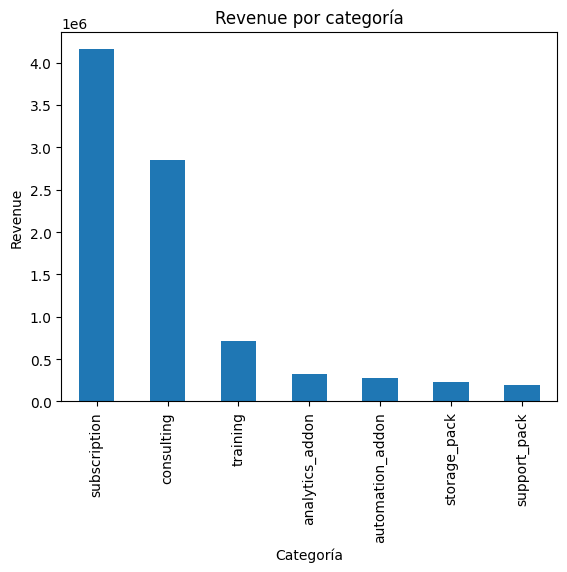

In [7]:
revenue_by_category.plot(kind="bar")
plt.title("Revenue por categoría")
plt.xlabel("Categoría")
plt.ylabel("Revenue")
plt.show()


Calculo de dinero se genera por usuario.


In [8]:
revenue_per_user = (
    transactions
    .groupby("user_id")["net_revenue"]
    .sum()
    .reset_index()
)

revenue_per_user.head()

,user_id,net_revenue
0,2,243.53
1,3,15.32
2,4,223.99
3,5,7.54
4,6,15.00


Observación del reparto del gasto entre usuarios.


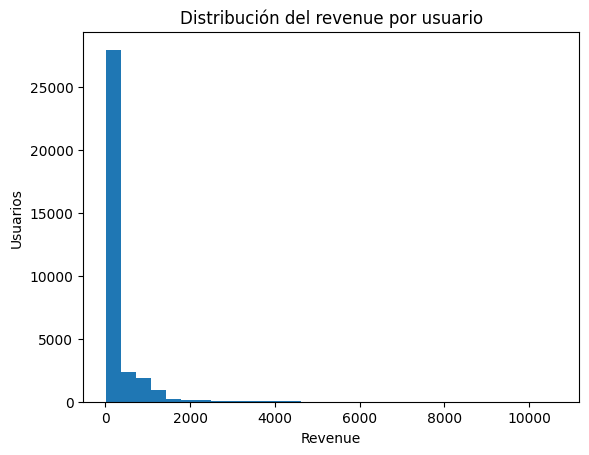

In [9]:
revenue_per_user["net_revenue"].plot(kind="hist", bins=30)
plt.title("Distribución del revenue por usuario")
plt.xlabel("Revenue")
plt.ylabel("Usuarios")
plt.show()


Analizamos cómo evoluciona el revenue con el tiempo.

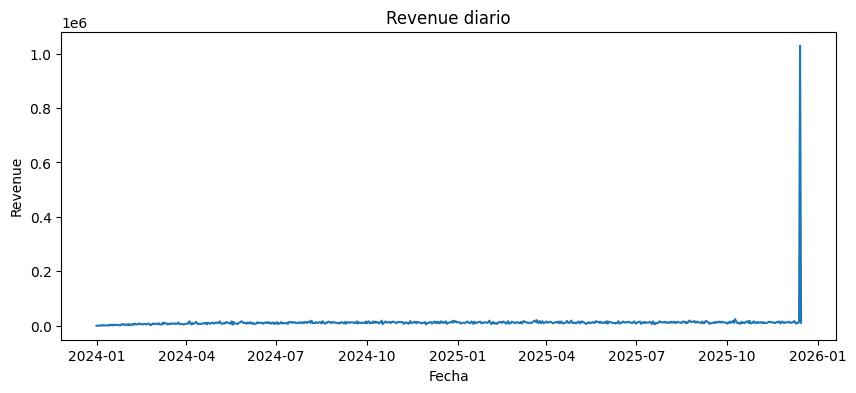

In [10]:
transactions["transaction_ts"] = pd.to_datetime(transactions["transaction_ts"])

revenue_by_date = (
    transactions
    .groupby(transactions["transaction_ts"].dt.date)["net_revenue"]
    .sum()
)

revenue_by_date.plot(figsize=(10, 4))
plt.title("Revenue diario")
plt.xlabel("Fecha")
plt.ylabel("Revenue")
plt.show()


Analisis de  reembolsos para entendimiento de  pérdidas de ingresos.


In [11]:
refunds = transactions[transactions["refund_ts"].notna()]
refunds.shape


(6069, 13)

Calculo de dinero perdido por reembolsos.


In [12]:
refund_amount = refunds["net_revenue"].sum()
refund_amount

np.float64(538631.53)

Conclusiones:

- Ciertas categorías generan más ingresos que otras.
- No todos los usuarios aportan el mismo valor.
- Los reembolsos tienen impacto directo en el revenue final.
- El revenue presenta variaciones a lo largo del tiempo.
